In [1]:
import numpy as np
import pandas as pd
import math
import keras
from matplotlib import pyplot as plt
plt.style.use("seaborn")



In [2]:
X_train=np.array(pd.read_csv('X_train').iloc[:,1:],dtype=float)
Y_train=np.array(pd.read_csv('Y_train').iloc[:,1:],dtype=float)

#Standardization
column = np.arange(X_train.shape[1])  
X_mean = np.mean(X_train[:, column] ,axis=0).transpose()
X_std  = np.std(X_train[:, column], axis=0).transpose()
X_train[:,column] = (X_train[:, column] - X_mean) / (X_std + 1e-8)
X_train

array([[-0.42755297,  0.99959458, -0.1822401 , ...,  0.80645987,
        -1.01485522,  1.01485522],
       [ 1.19978056,  0.99959458, -0.1822401 , ...,  0.80645987,
        -1.01485522,  1.01485522],
       [ 1.63373617, -1.00040555, -0.1822401 , ..., -1.45536172,
        -1.01485522,  1.01485522],
       ...,
       [-1.34970864, -1.00040555, -0.1822401 , ..., -1.10738916,
         0.98536219, -0.98536219],
       [ 0.3861138 ,  0.99959458, -0.1822401 , ...,  0.80645987,
        -1.01485522,  1.01485522],
       [ 0.3861138 , -1.00040555, -0.1822401 , ..., -1.45536172,
        -1.01485522,  1.01485522]])

In [3]:
#由於testing data沒有答案，直接將training data分成三份training,validation,testing
x_partial_train=X_train[:math.floor(0.8*X_train.shape[0]),:]
y_partial_train=Y_train[:math.floor(0.8*X_train.shape[0]),:]
x_val=X_train[math.floor(0.8*X_train.shape[0]):-2000,:]
y_val=Y_train[math.floor(0.8*X_train.shape[0]):-2000,:]
x_test=X_train[-2000:,:]
y_test=Y_train[-2000:,:]
print(x_partial_train.shape,x_val.shape,x_test.shape)
print(y_partial_train.shape,y_val.shape,y_test.shape)

(43404, 510) (8852, 510) (2000, 510)
(43404, 1) (8852, 1) (2000, 1)


In [4]:
from keras import models
from keras import layers
# input_shape=(10000,)，去掉smaples的維度
# models.Sequential()純粹一層接一層連接在一起
# relu: f(x)=0 if x<0, f(x)=x if x>=0
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(510,)))
model.add(layers.Dense(16, activation='relu', input_shape=(510,)))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
85/85 [==============================] - 0s 5ms/step - loss: 0.3917 - accuracy: 0.8223 - val_loss: 0.3165 - val_accuracy: 0.8599
Epoch 2/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8703 - val_loss: 0.3017 - val_accuracy: 0.8655
Epoch 3/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8790 - val_loss: 0.2944 - val_accuracy: 0.8693
Epoch 4/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.8838 - val_loss: 0.2907 - val_accuracy: 0.8700
Epoch 5/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.8861 - val_loss: 0.2894 - val_accuracy: 0.8736
Epoch 6/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2573 - accuracy: 0.8889 - val_loss: 0.2885 - val_accuracy: 0.8735
Epoch 7/20
85/85 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.8899 - val_loss: 0.2869 - val_accuracy: 0.8748
Epoch 8/20
85/85 [==

In [7]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
history_dict = history.history

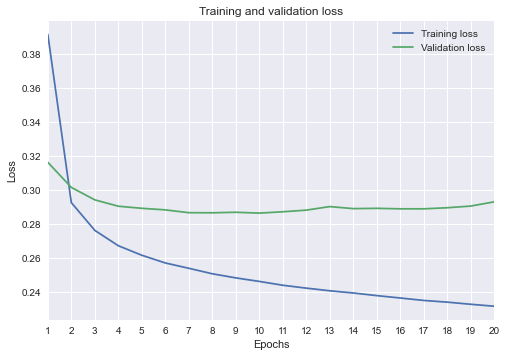

In [8]:
def plot_Training_validation_loss(history_dict,title):
    epoch=np.arange(1,len(history_dict['loss'])+1)
    plt.plot(epoch, history_dict['loss'], '-', label='Training loss')
    plt.plot(epoch, history_dict['val_loss'], '-', label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    x_major_locator=plt.MultipleLocator(1)
    plt.gca().xaxis.set_major_locator(x_major_locator)
    plt.xlim(1,len(epoch))
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_Training_validation_loss(history_dict,'Training and validation loss')

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(510,)))
model.add(layers.Dense(16, activation='relu', input_shape=(510,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train[:-2000,:],Y_train[:-2000,:], epochs=7, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/7
103/103 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8145
Epoch 2/7
103/103 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8722
Epoch 3/7
103/103 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.8802
Epoch 4/7
103/103 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.8837
Epoch 5/7
103/103 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.8873: 0s - loss: 0.2621 - accuracy: 0.88
Epoch 6/7
103/103 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8874
Epoch 7/7
63/63 [==============================] - 0s 792us/step - loss: 0.3022 - accuracy: 0.8715
